<a href="https://colab.research.google.com/github/bluffish/UILCode/blob/main/Copy_of_ES_Futures_Statistical_Projection_ThinkOrSwim_Indicator_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provided for members of the UseThinkScript community by
@mashume

The content of this notebook, the statistics generated and any indicators for ThinkOrSwim generated are not financial advice.

The author is not responsible for any losses you may incur using this notebook or the information derived from it.

This notebook, the code, and the indicator generated are all (c) Seth Urion (@mashume) 2021.

This software is released, as applicable, under the GPL, as open source software.

Thank you.

In [ ]:
try:
  import yfinance as yf
except:
  !pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance
  import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]


Adjust the ticker below to get time series data for other symbols.

In [ ]:
tickers = ['ES=F', 'CL=F', '^VIX', 'GC=F', 'ZN=F']

es_data = yf.Ticker('ES=F')
ticker = '/ES'
es_df = es_data.history(interval='5m', period='60d', prepost=True)

In [ ]:
es_df['EST'] = es_df.index.tz_convert(None)

In [ ]:
es_df['Close_30'] = es_df.Close.shift(-6)
es_df['Close_60'] = es_df.Close.shift(-12)
es_df['Close_90'] = es_df.Close.shift(-18)
es_df['Close_120'] = es_df.Close.shift(-24)
es_df['Close_180'] = es_df.Close.shift(-36)
es_df['Close_240'] = es_df.Close.shift(-48)
es_df['Close_360'] = es_df.Close.shift(-72)
es_df['Close_720'] = es_df.Close.shift(-144)
es_df['Close_1440'] = es_df.Close.shift(-276)

In [ ]:
es_df['pl_30'] = es_df.Close_30 - es_df.Close
es_df['pl_60'] = es_df.Close_60 - es_df.Close
es_df['pl_90'] = es_df.Close_90 - es_df.Close
es_df['pl_120'] = es_df.Close_120 - es_df.Close
es_df['pl_180'] = es_df.Close_180 - es_df.Close
es_df['pl_240'] = es_df.Close_240 - es_df.Close
es_df['pl_360'] = es_df.Close_360 - es_df.Close
es_df['pl_720'] = es_df.Close_720 - es_df.Close
es_df['pl_1440'] = es_df.Close_1440 - es_df.Close

In [ ]:
agg = pd.DataFrame()

In [ ]:
agg['pl30'] = es_df['pl_30'].groupby(es_df['pl_30'].index.hour).mean()
agg['pl60'] = es_df['pl_60'].groupby(es_df['pl_60'].index.hour).mean()
agg['pl90'] = es_df['pl_90'].groupby(es_df['pl_90'].index.hour).mean()
agg['pl120'] = es_df['pl_120'].groupby(es_df['pl_120'].index.hour).mean()
agg['pl180'] = es_df['pl_180'].groupby(es_df['pl_180'].index.hour).mean()
agg['pl240'] = es_df['pl_240'].groupby(es_df['pl_240'].index.hour).mean()
agg['pl360'] = es_df['pl_360'].groupby(es_df['pl_360'].index.hour).mean()
agg['pl720'] = es_df['pl_720'].groupby(es_df['pl_720'].index.hour).mean()
agg['pl1440'] = es_df['pl_1440'].groupby(es_df['pl_1440'].index.hour).mean()


<Axes: >

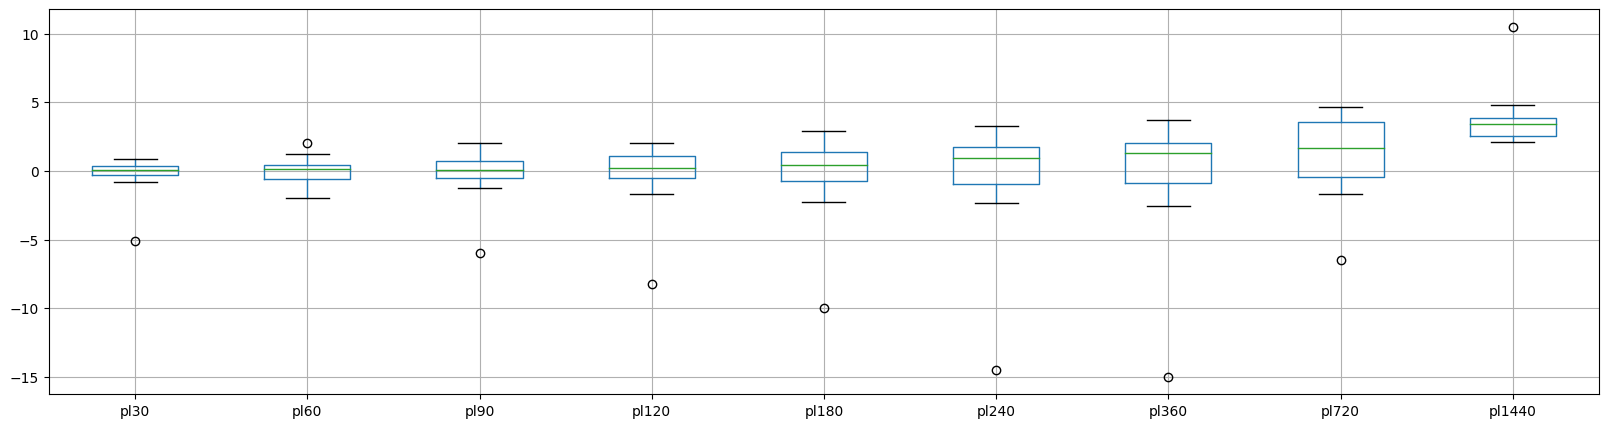

In [ ]:
agg.boxplot()

In [ ]:
timeofday = agg.T

<Axes: >

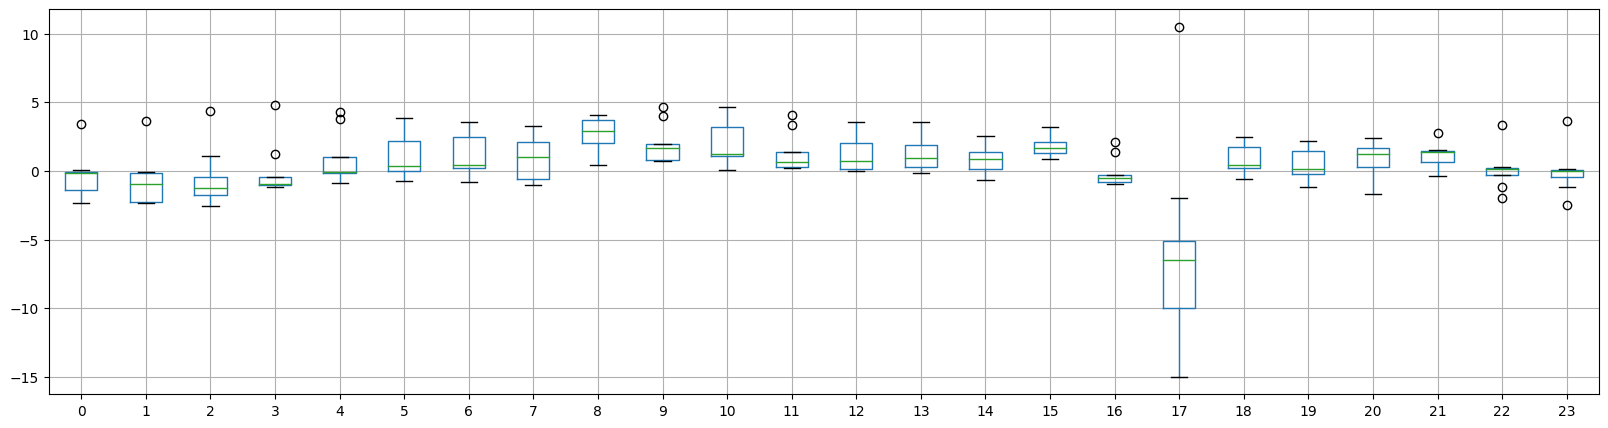

In [ ]:
timeofday.boxplot()

In [ ]:
agg.keys()

Index(['pl30', 'pl60', 'pl90', 'pl120', 'pl180', 'pl240', 'pl360', 'pl720',
       'pl1440'],
      dtype='object')

In [ ]:
# short = hold for 1/2, 1, or 2 hours
short_hold = agg.drop(['pl180', 'pl240', 'pl360', 'pl720', 'pl1440'], axis = 1).T

<Axes: >

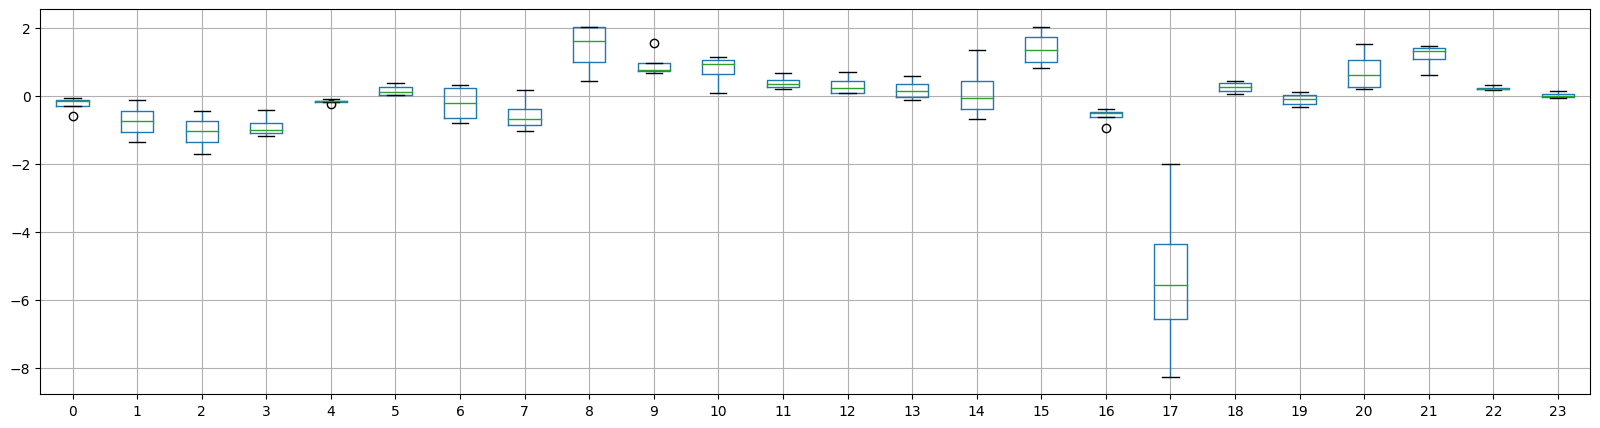

In [ ]:
short_hold.boxplot()

In [ ]:
# medium hold time --> hold for 1 1/2, 2, or 3 hours
med_hold = agg.drop(['pl30', 'pl60', 'pl360', 'pl720', 'pl1440'], axis = 1).T

<Axes: >

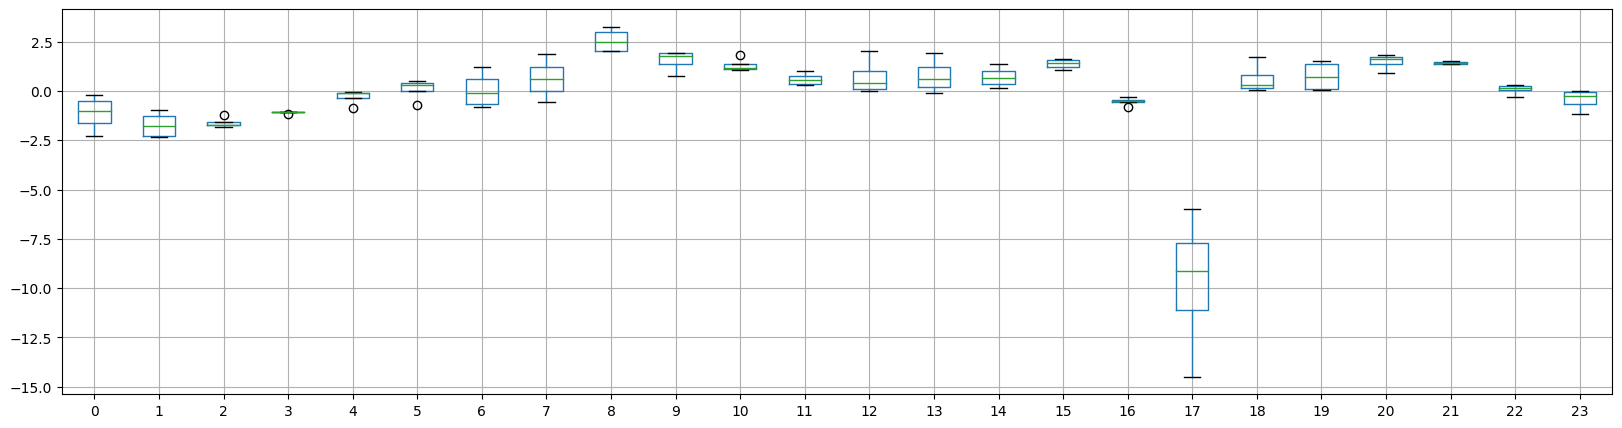

In [ ]:
med_hold.boxplot()

In [ ]:
# Long Hold Time --> hold for 6, 12 or 24 hours
long_hold = agg.drop(['pl30', 'pl60', 'pl120', 'pl180', 'pl240'], axis = 1).T

<Axes: >

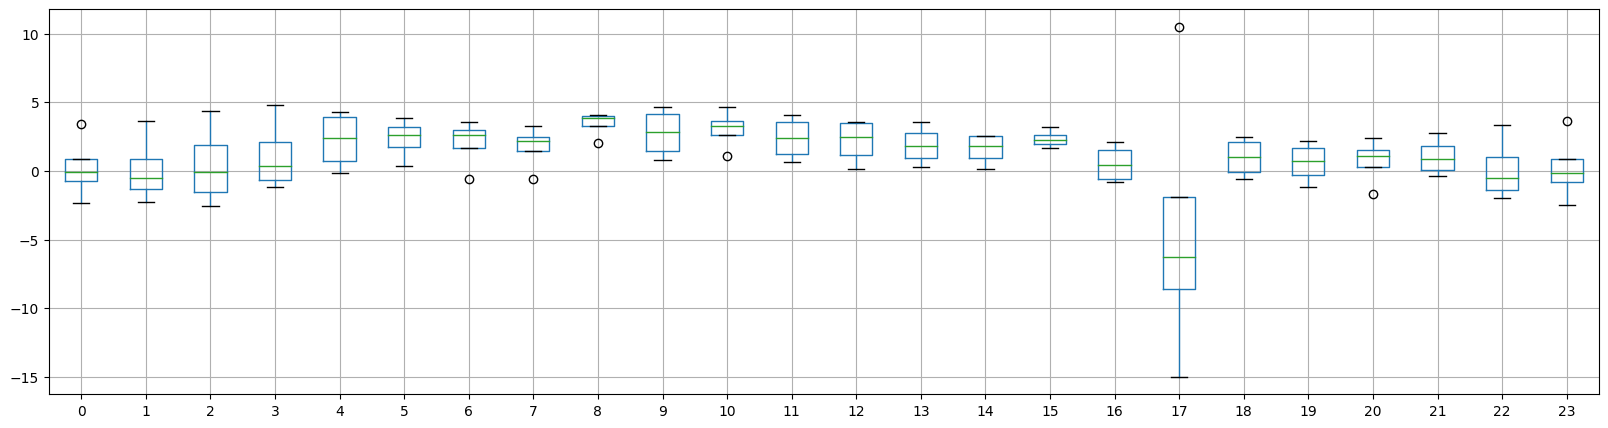

In [ ]:
long_hold.boxplot()

In [ ]:
hour_agg = pd.DataFrame()

In [ ]:
series = 'pl_60'
hour_agg['mean'] = es_df[series].groupby(es_df[series].index.hour).mean()
hour_agg['max'] = es_df[series].groupby(es_df[series].index.hour).max()
hour_agg['min'] = es_df[series].groupby(es_df[series].index.hour).min()
hour_agg['stddev'] = es_df[series].groupby(es_df[series].index.hour).std()
hour_agg['q1'] = es_df[series].groupby(es_df[series].index.hour).quantile(0.25)
hour_agg['q3'] = es_df[series].groupby(es_df[series].index.hour).quantile(0.75)
hour_agg['med'] = es_df[series].groupby(es_df[series].index.hour).median()


In [ ]:
q1 = hour_agg['q1'].reindex(range(24), fill_value = 0)
q3 = hour_agg['q3'].reindex(range(24), fill_value = 0)

In [ ]:
hour_agg

,mean,max,min,stddev,q1,q3,med
Datetime,,,,,,,
0,-0.067083,9.00,-11.50,2.579492,-1.3125,1.5000,0.000
1,-0.528750,14.75,-40.25,5.264786,-2.5000,2.2500,-0.250
2,-0.811667,12.75,-35.25,6.164105,-3.7500,3.5000,0.250
3,-0.921167,16.25,-36.50,6.548183,-4.5000,3.2500,-0.250
4,-0.154167,30.50,-49.50,7.984568,-2.5625,3.7500,0.875
5,0.025877,18.75,-47.50,7.515573,-2.0000,4.0000,0.750
6,0.209167,24.50,-29.50,5.855701,-3.2500,3.7500,0.500
7,-1.009583,32.50,-53.25,8.629429,-4.0000,2.5000,-0.500
8,1.205417,35.50,-46.75,10.425474,-5.0000,7.0000,0.750


In [ ]:
print(f"""#########################################################
#
#   Next Hour {ticker} Trading Range
#     Algorithmic Prediction
#
#   Values Derived on Data from""")
print('#          ' + str(es_df.index[0])[0:10] + ' to')
print('#          ' + str(es_df.index[len(es_df) - 1])[:10])
print(f"""#
#   mashume at usethinkscript.com
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
#
#  This Version {ticker} only
#  Functional on 1, 2, 3, 5, 10, 15, 20, 30, 60 minute charts
#
#########################################################

declare upper;

def Y = 31556926;
def M = 2629743;
def D = 86400;
def H = 3600;
def HalfHour = 1800;
def epoch = (getTime() / 1000);
def YMD = (epoch % Y) - (epoch / Y);
def month = (Floor(YMD / M) + 1);
def GMT = Floor((epoch % D) / H);
def HOUR = if GMT > 4 then GMT - 4 else if GMT < 4 then (GMT + 24) - 4 else 0;

def tf = getAggregationPeriod();

def barsPerHour = if tf == AggregationPeriod.HOUR then 1
    else if tf == AggregationPeriod.THIRTY_MIN then 2
    else if tf == AggregationPeriod.TWENTY_MIN then 3
    else if tf == AggregationPeriod.FIFTEEN_MIN then 4
    else if tf == AggregationPeriod.TEN_MIN then 6
    else if tf == AggregationPeriod.FIVE_MIN then 12
    else if tf == AggregationPeriod.THREE_MIN then 20
    else if tf == AggregationPeriod.TWO_MIN then 30
    else if tf == AggregationPeriod.MIN then 60
    else double.nan;
    
""")
lower_quartile = hour_agg['q1'].reindex(range(24), fill_value = 0)# hour_agg.q1.values
print('def q1 =')
print('    if HOUR == 0 then ' + str(round(lower_quartile[0], 3)))
for h in range(1, 23):
    print(f'    else if HOUR == {h} then {round(lower_quartile[h], 3)}')
print(f'    else {round(lower_quartile[23], 3)};')

upper_quartile = hour_agg['q3'].reindex(range(24), fill_value = 0)#hour_agg.q3.values
print('def q3 =')
print('    if HOUR == 0 then ' + str(round(upper_quartile[0], 3)))
for h in range(1, 23):
    print(f'    else if HOUR == {h} then {round(upper_quartile[h], 3)}')
print(f'    else {round(upper_quartile[23], 3)};')

median = hour_agg['med'].reindex(range(24), fill_value = 0) # hour_agg.med.values
print('def m2 =')
print('    if HOUR == 0 then ' + str(round(median[0], 3)))
for h in range(1, 23):
    print(f'    else if HOUR == {h} then {round(median[h], 3)}')
print(f'    else {round(median[23], 3)};')
print("""
def midline = hl2(period = AggregationPeriod.HOUR)[1];
def median = hl2(period = AggregationPeriod.HOUR)[1] + m2;
def upper = median + (q3);
def lower = median + (q1);

plot c = midline;
c.setStyle(CURve.SHORT_DASH);
c.setDefaultColor(getColor(7));

plot median_line = median[barsPerHour];
median_line.SetPaintingStrategy(PaintingStrategy.DASHES);
median_line.SetDefaultColor(getColor(3));
plot expected_upper = upper[barsPerHour];
expected_upper.SetPaintingStrategy(PaintingStrategy.HORIZONTAL);
expected_upper.SetDefaultColor(getColor(1));
plot expected_lower = lower[barsPerHour];
expected_lower.SetPaintingStrategy(PaintingStrategy.HORIZONTAL);
expected_lower.SetDefaultColor(getColor(5));

addcloud(expected_upper, expected_lower, color.white, color.white);
def upside = (expected_upper[(-1 * barsPerHour)] - close);
def downside = (close - expected_lower[(-1 * barsPerHour)]);
addLabel(yes, "current upside: " + upside + "  current downside: " + downside, if upside > downside then color.dark_green else if downside > upside then color.dark_red else color.dark_gray);

def dist_to_median = (median_line[(-1 * barsPerHour)] - close);
addLabel(yes, "Distance to Median: " + dist_to_median, 
if dist_to_median > 5 then color.green 
else if dist_to_median > 1 then color.dark_green 
else if dist_to_median < -5 then color.red
else if dist_to_median < -1 then color.dark_red 
else color.gray);
""")

#########################################################
#
#   Next Hour /ES Trading Range
#     Algorithmic Prediction
#
#   Values Derived on Data from
#          2023-02-28 to
#          2023-05-09
#
#   mashume at usethinkscript.com
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
#
#  This Version /ES only
#  Functional on 1, 2, 3, 5, 10, 15, 20, 30, 60 minute charts
#
#########################################################

declare upper;

def Y = 31556926;
def M = 2629743;
def D = 86400;
def H = 3600;
def HalfHour = 1800;
def epoch = (getTime() / 1000);
def YMD = (epoch % Y) - (epoch / Y);
def month = (Floor(YMD / M) + 1);
def GMT = Floor((epoch % D) / H);
def HOUR = if GMT > 4 then GMT - 4 else if GMT < 4 then (GMT + 24) - 4 else 0;

def tf = getAggregationPeriod();

def barsPerHour = if tf == AggregationPeriod.HOUR then 1
    else if tf == AggregationPeriod.THIRTY_MIN then 2
    else if tf == AggregationPeriod.TWENTY_MIN then 3
    else if tf == AggregationPeriod

The next two cells print out the first and last rows of the data, good for you to pull the date range that the indicator has been built from.

In [ ]:
es_df.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EST,Close_30,Close_60,...,Close_1440,pl_30,pl_60,pl_90,pl_120,pl_180,pl_240,pl_360,pl_720,pl_1440
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-02-28 00:00:00-05:00,3991.5,3991.5,3991.5,3991.5,0,0.0,0.0,2023-02-28 05:00:00,3988.25,3989.5,...,3975.75,-3.25,-2.0,-1.0,-2.5,-14.75,-9.75,2.5,-1.0,-15.75


In [ ]:
es_df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EST,Close_30,Close_60,...,Close_1440,pl_30,pl_60,pl_90,pl_120,pl_180,pl_240,pl_360,pl_720,pl_1440
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-09 19:15:00-04:00,4136.5,4136.5,4135.75,4136.25,93,0.0,0.0,2023-05-09 23:15:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
